# MODEL BUILDING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt
%matplotlib inline
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acs
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lg
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier  
from catboost import CatBoostClassifier

In [3]:
df=pd.read_csv('model1.csv')

In [4]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.952381,0.0,0.071429,0.244898,1.00,0.000000,0.017647,1.000000,1.00,1.000000,0.325767,0.750,0.693878,0.333333,0.333333,1.000000,1.000000,0.4,1.000000,0.769231,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.404762,0.0,0.436429,0.551020,0.75,0.666667,0.352941,0.000000,1.00,0.000000,0.800016,0.750,0.959184,1.000000,1.000000,0.666667,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.452381,0.0,0.697857,0.306122,1.00,0.666667,0.658824,0.333333,0.50,0.333333,0.551831,0.375,0.448980,0.666667,0.666667,0.333333,0.128205,0.0,0.000000,0.051282,0.051282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.380952,1.0,0.785000,0.183673,0.25,0.333333,0.982353,0.333333,0.00,1.000000,0.439369,0.250,0.040816,0.000000,1.000000,0.000000,0.153846,0.6,0.666667,0.128205,0.102564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.714286,0.0,0.060000,0.673469,0.50,0.666667,0.547059,0.000000,0.50,0.000000,0.310546,0.125,0.285714,0.333333,1.000000,0.333333,0.410256,1.0,0.333333,0.256410,0.128205,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,0.047619,0.0,0.980000,0.816327,0.50,0.000000,1.000000,0.666667,0.75,1.000000,0.072541,1.000,0.224490,0.000000,0.000000,0.000000,0.025641,0.6,0.333333,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
546217,1.000000,1.0,0.850000,0.163265,1.00,0.666667,0.858824,1.000000,0.50,0.000000,0.496470,0.000,0.326531,0.666667,0.000000,0.000000,0.769231,0.4,0.000000,0.410256,0.410256,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
546218,0.785714,0.0,0.832143,1.000000,0.50,1.000000,0.729412,0.333333,0.50,0.000000,0.223164,0.000,0.040816,0.666667,0.666667,1.000000,0.358974,0.2,0.333333,0.282051,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
546219,0.880952,0.0,0.855714,0.653061,1.00,0.000000,0.658824,0.000000,0.50,0.666667,0.375808,0.625,0.530612,0.666667,1.000000,0.000000,0.717949,0.6,1.000000,0.692308,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Department_Software', 'Department_Support',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing D

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546221 entries, 0 to 546220
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                546221 non-null  float64
 1   Attrition                          546221 non-null  float64
 2   DailyRate                          546221 non-null  float64
 3   DistanceFromHome                   546221 non-null  float64
 4   Education                          546221 non-null  float64
 5   EnvironmentSatisfaction            546221 non-null  float64
 6   HourlyRate                         546221 non-null  float64
 7   JobInvolvement                     546221 non-null  float64
 8   JobLevel                           546221 non-null  float64
 9   JobSatisfaction                    546221 non-null  float64
 10  MonthlyIncome                      546221 non-null  float64
 11  NumCompaniesWorked                 5462

In [7]:
df.shape

(546221, 46)

In [8]:
df["Attrition"]=df["Attrition"].astype(int)

In [9]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [10]:
df["Attrition"].value_counts()

0    273189
1    273032
Name: Attrition, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1000)

In [12]:
x_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Department_Software', 'Department_Support',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'Jo

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409665 entries, 190599 to 107955
Data columns (total 45 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                409665 non-null  float64
 1   DailyRate                          409665 non-null  float64
 2   DistanceFromHome                   409665 non-null  float64
 3   Education                          409665 non-null  float64
 4   EnvironmentSatisfaction            409665 non-null  float64
 5   HourlyRate                         409665 non-null  float64
 6   JobInvolvement                     409665 non-null  float64
 7   JobLevel                           409665 non-null  float64
 8   JobSatisfaction                    409665 non-null  float64
 9   MonthlyIncome                      409665 non-null  float64
 10  NumCompaniesWorked                 409665 non-null  float64
 11  PercentSalaryHike                 

### Logistic Regression

In [14]:
lr = lg().fit(x_train,y_train)
Pred1 = lr.predict(x_test)
Pred1

array([1, 0, 1, ..., 1, 1, 0])

In [15]:
print("Training Accuracy:",lr.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,Pred1))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred1))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred1))

Training Accuracy: 0.5035065236229602
------------------------------------------------------------
Testing Accuracy:
 0.5012815255279885
-------------------------------------------------
Confusion Matrix:
 [[37000 31183]
 [36920 31453]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     68183
           1       0.50      0.46      0.48     68373

    accuracy                           0.50    136556
   macro avg       0.50      0.50      0.50    136556
weighted avg       0.50      0.50      0.50    136556



### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier as dtc

dt = dtc().fit(x_train,y_train)
Pred2 = dt.predict(x_test)
Pred2

array([1, 0, 1, ..., 1, 1, 1])

In [17]:
print("Training Accuracy:",dt.score(x_train,y_train))
print("------------------------------------------------------------")
print(" Testing Accuracy:\n" ,acs(y_test,Pred2))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred2))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred2))

Training Accuracy: 1.0
------------------------------------------------------------
 Testing Accuracy:
 0.5030756612671724
-------------------------------------------------
Confusion Matrix:
 [[34373 33810]
 [34048 34325]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     68183
           1       0.50      0.50      0.50     68373

    accuracy                           0.50    136556
   macro avg       0.50      0.50      0.50    136556
weighted avg       0.50      0.50      0.50    136556



### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [19]:
from sklearn.ensemble import RandomForestClassifier as rfc
rf = rfc(n_estimators=100,criterion='gini',
    max_depth=100,
    min_samples_split=200,
    min_samples_leaf=100,
    max_features='sqrt',
    max_leaf_nodes=10,
    n_jobs=-1,
    random_state=204,
    max_samples=None,).fit(x_train,y_train)
Pred = rf.predict(x_test)
Pred

array([1, 0, 1, ..., 1, 0, 0])

In [20]:
print("Training Accuracy:",rf.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,Pred))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred))

Training Accuracy: 0.5171786703770154
------------------------------------------------------------
Testing Accuracy:
 0.49936289873751427
-------------------------------------------------
Confusion Matrix:
 [[46360 21823]
 [46542 21831]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.50      0.68      0.58     68183
           1       0.50      0.32      0.39     68373

    accuracy                           0.50    136556
   macro avg       0.50      0.50      0.48    136556
weighted avg       0.50      0.50      0.48    136556



### GradientBoosting Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
gbr = GradientBoostingClassifier(n_estimators = 200, max_depth = 1, random_state = 100)

In [23]:
gbr.fit(x_train,y_train)
y_pred1=gbr.predict(x_test)
y_pred1

array([1, 0, 1, ..., 1, 1, 0])

In [24]:
print("Training Accuracy:",gbr.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,y_pred1))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,y_pred1))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,y_pred1))

Training Accuracy: 0.5057180867294009
------------------------------------------------------------
Testing Accuracy:
 0.4998901549547438
-------------------------------------------------
Confusion Matrix:
 [[40827 27356]
 [40937 27436]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.54     68183
           1       0.50      0.40      0.45     68373

    accuracy                           0.50    136556
   macro avg       0.50      0.50      0.50    136556
weighted avg       0.50      0.50      0.49    136556



### XGBoost

In [25]:
import xgboost as xgb

In [26]:
xgb1=xgb.XGBClassifier()
xgb1.fit(x_train,y_train)
predictions = xgb1.predict(x_test)
predictions

array([1, 0, 0, ..., 1, 1, 0])

In [27]:
print("Training Accuracy:",xgb1.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,predictions))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,predictions))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,predictions))

Training Accuracy: 0.5920227502959735
------------------------------------------------------------
Testing Accuracy:
 0.5010764814435104
-------------------------------------------------
Confusion Matrix:
 [[34630 33553]
 [34578 33795]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50     68183
           1       0.50      0.49      0.50     68373

    accuracy                           0.50    136556
   macro avg       0.50      0.50      0.50    136556
weighted avg       0.50      0.50      0.50    136556



## CatBoost

In [28]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=30000, 
    learning_rate=0.1, 
)


clf.fit(x_train, y_train, 
     
        eval_set=(x_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())
p9=clf.predict(x_test)
p9

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 30000, 'learning_rate': 0.1}


array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [29]:
print("Training Accuracy:",clf.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,p9))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,p9))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,p9))

Training Accuracy: 0.9269940072986464
------------------------------------------------------------
Testing Accuracy:
 0.6127596004569554
-------------------------------------------------
Confusion Matrix:
 [[41777 26406]
 [26474 41899]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61     68183
           1       0.61      0.61      0.61     68373

    accuracy                           0.61    136556
   macro avg       0.61      0.61      0.61    136556
weighted avg       0.61      0.61      0.61    136556



### LightGBM

In [30]:
%%time
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)
lgbm.fit(x_train, y_train)
p8 = lgbm.predict(x_test)
p8

CPU times: total: 47min 21s
Wall time: 18min 36s


array([0, 1, 1, ..., 1, 1, 1])

<AxesSubplot:>

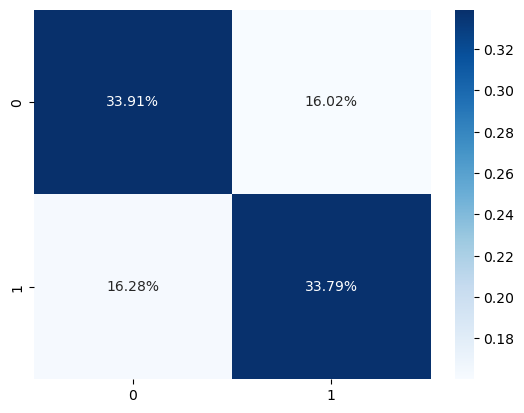

In [31]:
cf_matrix=cm(y_test,p8)
sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt=".2%",cmap="Blues")

In [32]:
print("Training Accuracy:",lgbm.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,p8))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,p8))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,p8))

Training Accuracy: 0.8539709274651239
------------------------------------------------------------
Testing Accuracy:
 0.677004305925774
-------------------------------------------------
Confusion Matrix:
 [[46307 21876]
 [22231 46142]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68     68183
           1       0.68      0.67      0.68     68373

    accuracy                           0.68    136556
   macro avg       0.68      0.68      0.68    136556
weighted avg       0.68      0.68      0.68    136556



In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
KFold_validation=KFold(5)
results=cross_val_score(lgbm,x,y,cv=KFold_validation)
print(results)
print(np.mean(results))

[0.69423772 0.68822086 0.68362565 0.6871041  0.68296657]
0.6872309797559178


### Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred2=nb.predict(x_test)
y_pred2

array([0, 1, 1, ..., 1, 1, 1])

In [34]:
print("Training Accuracy:",nb.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,y_pred2))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,y_pred2))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,y_pred2))

Training Accuracy: 0.5028474485250144
------------------------------------------------------------
Testing Accuracy:
 0.5005126102111954
-------------------------------------------------
Confusion Matrix:
 [[35758 32425]
 [35783 32590]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     68183
           1       0.50      0.48      0.49     68373

    accuracy                           0.50    136556
   macro avg       0.50      0.50      0.50    136556
weighted avg       0.50      0.50      0.50    136556



##### ROC AUC CURVE

In [35]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, Pred1[:,], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, Pred2[:,], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, Pred[:,], pos_label=1)
fpr4, tpr4, thresh3 = roc_curve(y_test, y_pred1[:,], pos_label=1)
fpr5, tpr5, thresh3 = roc_curve(y_test, predictions[:,], pos_label=1)
fpr6, tpr6, thresh3 = roc_curve(y_test, p9[:,], pos_label=1)
fpr7, tpr7, thresh3 = roc_curve(y_test, p8[:,], pos_label=1)
fpr8, tpr8, thresh3 = roc_curve(y_test, y_pred2[:,], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [36]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(y_test, Pred1[:,])
auc_score2 = roc_auc_score(y_test, Pred2[:,])
auc_score3 = roc_auc_score(y_test, Pred[:,])
auc_score4 = roc_auc_score(y_test, y_pred1[:,])
auc_score5 = roc_auc_score(y_test, predictions[:,])
auc_score6 = roc_auc_score(y_test, p9[:,])
auc_score7 = roc_auc_score(y_test, p8[:,])
auc_score8 = roc_auc_score(y_test, y_pred2[:,])
print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7,auc_score8)

0.5013390145197332 0.503077124252774 0.49961379219439295 0.5000275640091801 0.5010859593259744 0.6127595436462228 0.6770072977391741 0.500545858010514


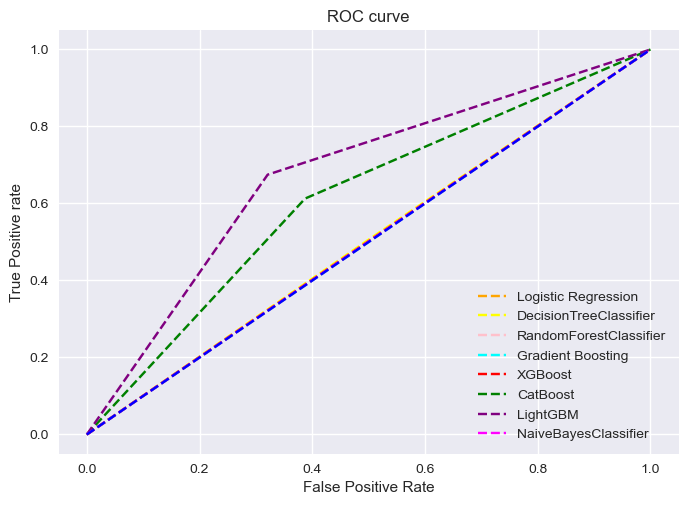

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='DecisionTreeClassifier')
plt.plot(fpr3, tpr3, linestyle='--',color='pink', label='RandomForestClassifier')
plt.plot(fpr4, tpr4, linestyle='--',color='cyan', label='Gradient Boosting')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='green', label='CatBoost')
plt.plot(fpr7, tpr7, linestyle='--',color='purple', label='LightGBM')
plt.plot(fpr8, tpr8, linestyle='--',color='magenta', label='NaiveBayesClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### ANN

In [44]:
from keras.models import Sequential
from keras .layers import Dense

In [45]:
classifier=Sequential()

In [46]:
classifier.add(Dense(activation="relu",input_dim=45,units=200,kernel_initializer="uniform"))

In [47]:
classifier.add(Dense(activation="relu",units=200,kernel_initializer="uniform"))

In [48]:
classifier.add(Dense(1,activation="sigmoid"))

In [49]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [50]:
import tensorflow as tf
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [51]:
model_history=classifier.fit(x_train,y_train,validation_split=0.20,batch_size =100,epochs =100,callbacks=early_stopping)

Epoch 1/100
3278/3278 [==============================] - 32s 9ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 2/100
3278/3278 [==============================] - 31s 9ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5005
Epoch 3/100
3278/3278 [==============================] - 37s 11ms/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 4/100
3278/3278 [==============================] - 26s 8ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 5/100
3278/3278 [==============================] - 25s 8ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 6/100
3278/3278 [==============================] - 24s 7ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4991
Epoch 7/100
3278/3278 [==============================] - 29s 9ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6932 

### As LightGBM got the better accuracy so we are using this model for development

In [52]:
lgbm.booster_.save_model("lgbm1.json")

Comment: After model development we observed that we were not getting correct predictions.so we modified the problem to predict whether the employee will get attrition within a year. 